In [12]:
## working on finalizing a model given reduced set of data columns.
from datetime import datetime, timedelta
import itertools
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
import scipy.stats as stats
import seaborn as sns
from sklearn import linear_model
from sklearn import metrics
from sklearn import preprocessing
from sklearn.cross_validation import train_test_split
from sklearn.pipeline import make_pipeline

import networkx as nx
from networkx.algorithms.components.connected import connected_components

%matplotlib notebook
%timeit

#show up to 100 columns.
pd.set_option('display.max_columns', 100, 'display.max_rows', 200)

In [26]:
## load pickle file with reduced data columns
file_name = 'theorem_model_variables_test.pkl'
reduced_data = pd.read_pickle(file_name)

In [14]:
reduced_data.head()

,DolLoanAmountRequested,BoolPartialFundingApproved,BorrowerRate,NumMonthsTerm,EnumListingCategory,DolMonthlyIncome,FracDebtToIncomeRatio,StrEmploymentStatus,StrOccupation,NumMonthsEmployed,NumPriorProsperLoans,NumPriorProsperLoansLatePayments,NumPriorProsperLoans61dpd,BoolIsLender,BoolInGroup,EnumChannelCode,NumTradesOpened6,NumOpenTradesDelinqOrPastDue6,DolTotalBalanceOnPublicRecords,NumRealEstateTrades,DolMonthlyDebt,NumCurrentDelinquencies,NumPublicRecordsLast10Years,NumPublicRecords12,DolAmountDelinquent,PctBankcardUtil,NumTotalInquiries,BoolEverWholeLoan,DaysSinceFirstCredit,Cancelled
ListingNumber,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
973605,15000.0,True,0.1620,60,1,6000.0000,0.27,Employed,Tradesman - Mechanic,445.0,0,NaN,NaN,0,False,70000,1,0,0,2,1242,0,0,0,0,0.97,5,True,13905,1
981099,15000.0,True,0.1585,60,1,7916.6667,0.35,Other,NaN,32.0,0,NaN,NaN,0,False,70000,1,0,0,2,2289,0,0,0,0,0.48,3,True,14242,1
1025766,4000.0,True,0.2085,36,1,2083.3333,0.53,Employed,Professional,4.0,3,0.0,NaN,0,False,80000,0,0,0,0,911,0,0,0,0,0.93,5,False,4151,0
1003835,10000.0,True,0.1299,36,13,3750.0000,0.14,Employed,Medical Technician,2.0,0,NaN,NaN,0,False,90000,1,0,0,0,223,0,0,0,0,0.26,1,True,2946,1
1011335,20000.0,True,0.1440,60,1,9000.0000,0.16,Employed,Executive,90.0,1,0.0,NaN,0,False,80000,1,0,1249,1,1264,1,2,0,0,0.81,17,False,8333,0


In [27]:
y = reduced_data['Cancelled']

X_test = reduced_data['StrEmploymentStatus'].to_frame()
X_dummies_employment = pd.get_dummies(X_test)

m_dummies = linear_model.LogisticRegression()
m_dummies.fit(X_dummies_employment,y)
print(m_dummies.coef_)

[[-0.0017751  -0.72693715  0.00883692  0.68626626 -0.01093869 -0.66273318]]


In [28]:
X_test = reduced_data['StrOccupation'].to_frame()
X_dummies_jobs = pd.get_dummies(X_test)

m_dummies = linear_model.LogisticRegression()
m_dummies.fit(X_dummies_jobs,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [29]:
X_dummies_jobs.head()

,StrOccupation_Accountant/CPA,StrOccupation_Administrative Assistant,StrOccupation_Analyst,StrOccupation_Architect,StrOccupation_Attorney,StrOccupation_Biologist,StrOccupation_Bus Driver,StrOccupation_Car Dealer,StrOccupation_Chemist,StrOccupation_Civil Service,StrOccupation_Clergy,StrOccupation_Clerical,StrOccupation_Computer Programmer,StrOccupation_Construction,StrOccupation_Dentist,StrOccupation_Doctor,StrOccupation_Engineer - Chemical,StrOccupation_Engineer - Electrical,StrOccupation_Engineer - Mechanical,StrOccupation_Executive,StrOccupation_Fireman,StrOccupation_Flight Attendant,StrOccupation_Food Service,StrOccupation_Food Service Management,StrOccupation_Homemaker,StrOccupation_Investor,StrOccupation_Judge,StrOccupation_Laborer,StrOccupation_Landscaping,StrOccupation_Medical Technician,StrOccupation_Military Enlisted,StrOccupation_Military Officer,StrOccupation_Nurse (LPN),StrOccupation_Nurse (RN),StrOccupation_Nurse's Aide,StrOccupation_Other,StrOccupation_Pharmacist,StrOccupation_Pilot - Private/Commercial,StrOccupation_Police Officer/Correction Officer,StrOccupation_Postal Service,StrOccupation_Principal,StrOccupation_Professional,StrOccupation_Professor,StrOccupation_Psychologist,StrOccupation_Realtor,StrOccupation_Religious,StrOccupation_Retail Management,StrOccupation_Sales - Commission,StrOccupation_Sales - Retail,StrOccupation_Scientist,StrOccupation_Skilled Labor,StrOccupation_Social Worker,StrOccupation_Student - College Freshman,StrOccupation_Student - College Graduate Student,StrOccupation_Student - College Junior,StrOccupation_Student - College Senior,StrOccupation_Student - College Sophomore,StrOccupation_Student - Community College,StrOccupation_Student - Technical School,StrOccupation_Teacher,StrOccupation_Teacher's Aide,StrOccupation_Tradesman - Carpenter,StrOccupation_Tradesman - Electrician,StrOccupation_Tradesman - Mechanic,StrOccupation_Tradesman - Plumber,StrOccupation_Truck Driver,StrOccupation_Waiter/Waitress
ListingNumber,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
973605,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
981099,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1025766,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1003835,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1011335,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


<IPython.core.display.Javascript object>


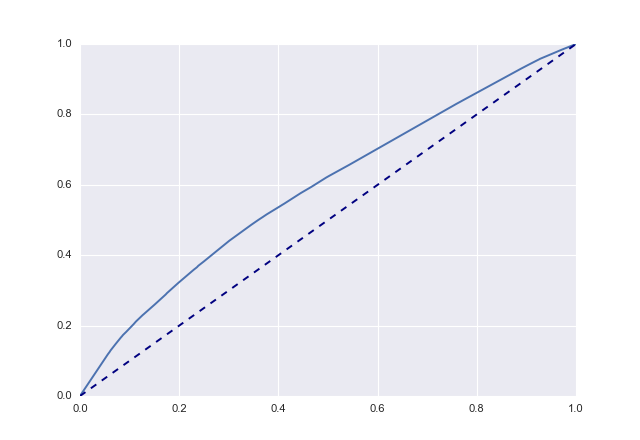

In [30]:
X_tr, X_te, y_tr, y_te = train_test_split(X_dummies, y, test_size=0.3, random_state=0)
probs = m_dummies.predict_proba(X_te)

fig, ax = plt.subplots()
fpr, tpr, thresholds = metrics.roc_curve(y_te,probs[:,1])
plt.plot(fpr,tpr)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')

In [36]:
v = ['BoolPriorProsperLoanee','DolLoanAmountRequested','PctBankcardUtil','DolMonthlyDebt','DolMonthlyIncome',\
      'BorrowerRate','NumRealEstateTrades','NumTotalInquiries']
X1 = pd.concat([reduced_data[v],X_dummies_employment], axis=1)
X2 = pd.concat([reduced_data[v],X_dummies_employment,X_dummies_jobs], axis=1)

<IPython.core.display.Javascript object>


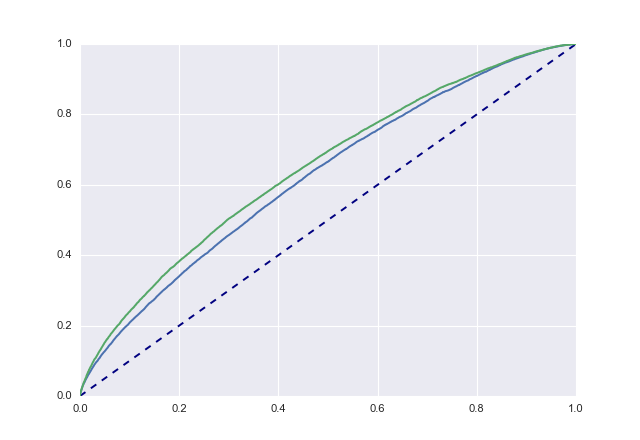

[[-0.28575986  0.22593062 -0.13914397 -0.14975843  0.39512829  0.06054305
  -0.10078444  0.05612311 -0.02160796 -0.02018936  0.00297525  0.17875407
  -0.02715858 -0.16240279]]
0.624052500889
[[ -2.73404968e-01   2.52007406e-01  -1.35237414e-01  -1.30443981e-01
    4.22735158e-01   5.25136836e-02  -9.39134333e-02   5.52010273e-02
    4.93458958e-02  -9.06859648e-03   1.29296370e-03   7.26468872e-02
   -2.89311648e-02  -1.49644782e-01  -1.22406493e-01  -8.86781410e-02
   -1.84243796e-01  -3.51266159e-02  -5.05056710e-02  -1.77819931e-02
   -1.11071771e-02  -2.30950999e-02  -2.70647157e-02  -1.14155440e-01
   -1.02404058e-03  -1.03936465e-01  -1.87772541e-01  -4.08409559e-02
    8.19681433e-03  -2.36603003e-02  -2.69525521e-02  -9.27851709e-02
   -9.52280701e-02  -1.32890982e-01  -4.84703744e-02  -1.11067294e-02
   -4.82233228e-04  -3.52184564e-02   2.80204280e-02   6.04077675e-03
   -7.89647808e-03  -2.79908567e-02   3.37348894e-03  -5.34532774e-02
   -7.30881023e-02  -4.90544972e-02  -2

In [37]:
fig, ax = plt.subplots()
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')

ssc = preprocessing.StandardScaler()
X1_s = ssc.fit_transform(X1)
X2_s = ssc.fit_transform(X2)

for X in [X1_s, X2_s]:
    X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.3, random_state=0)
    logm = linear_model.LogisticRegression()
    logm.fit(X_tr,y_tr)
    probs = logm.predict_proba(X_te)
    fpr, tpr, thresholds = metrics.roc_curve(y_te,probs[:,1])
    plt.plot(fpr,tpr)
    print(logm.coef_)
    print(metrics.roc_auc_score(y_te, probs[:,1]))